# 0.) Import and Clean data

In [2]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
names = df['country'].copy()
X = df.drop('country', axis = 1)

# 1.) Fit a kmeans Model with any Number of Clusters

In [6]:
scaler = StandardScaler().fit(X)
x_scaled = scaler.transform(X)

In [7]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(x_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

# 2.) Pick two features to visualize across

In [8]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

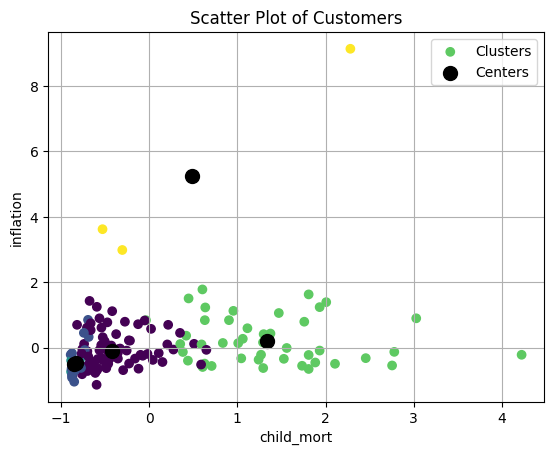

In [11]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 5

scatter = plt.scatter(x_scaled[:, x1_index], x_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [12]:
WCCSSs = []
Ks = range(1, 15)
for k in Ks:
    kmeans = KMeans(n_clusters=k, n_init = 30, init = 'random')
    kmeans.fit(x_scaled)
    WCCSSs.append(kmeans.inertia_)

In [13]:
#bonus optional
WCCSSs = [KMeans(n_clusters=k, n_init = 30, init = 'random').fit(x_scaled).inertia_ for k in Ks]

In [14]:
WCCSSs

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 700.3229986404374,
 632.3942572883416,
 564.7601700364371,
 510.36309561239426,
 465.978117311461,
 431.44625623130514,
 395.829996454276,
 376.55152385825465,
 357.54967211288044,
 335.4311212276747,
 323.95126663350186]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

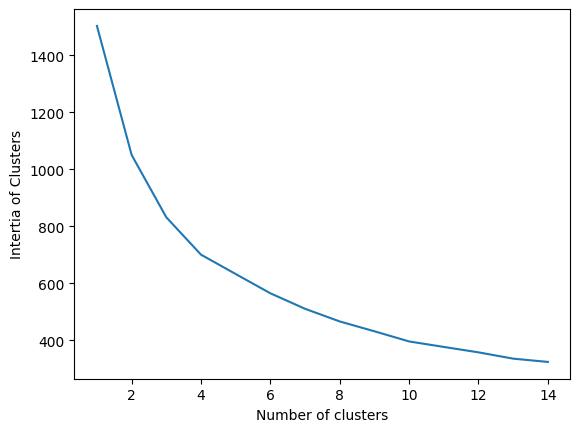

In [16]:
plt.plot(Ks, WCCSSs)
plt.xlabel('Number of clusters')
plt.ylabel('Intertia of Clusters')
plt.show()

# 6.) Do the same for a silhoutte plot

In [33]:
from sklearn.metrics import silhouette_score

In [18]:
SCs = []
Ks = range(2, 15)
for k in Ks:
    kmeans = KMeans(n_clusters=k, n_init = 30, init = 'random')
    kmeans.fit(x_scaled)
    SCs.append(silhouette_score(x_scaled, kmeans.labels_))


In [19]:
SCs

[0.287356689214067,
 0.28329575683463126,
 0.30210825058992513,
 0.21750750872974386,
 0.23517559069094127,
 0.23671433243289208,
 0.21591423060571588,
 0.2261091064765387,
 0.20389604904074235,
 0.2094518159234641,
 0.183496959772208,
 0.20161697351503233,
 0.18072073112810705]

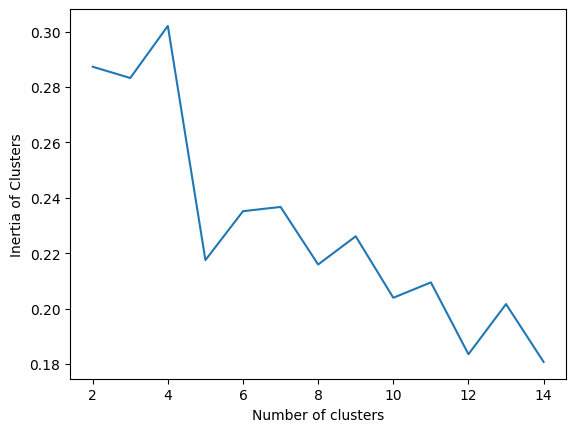

In [20]:
plt.plot(Ks, SCs)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia of Clusters')
plt.show()

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [62]:
kmeans2 = KMeans(n_clusters = 2, n_init = 30, init = 'random').fit(x_scaled)

In [63]:
kmeans2.predict(x_scaled)

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int32)

In [64]:
preds = pd.DataFrame(kmeans2.predict(x_scaled))

In [65]:
output = pd.concat([preds,df], axis = 1)

In [66]:
output

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,0,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,1,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,1,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,0,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [56]:
print('cluster 1:')
list(output.loc[output[0]==0, 'country'])

cluster 1:


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [58]:
print('cluseter 2:')
list(output.loc[output[0]==1, 'country'])

cluseter 2:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

It seems that countries categorized in cluster 0 are considered to be less developed than the countries in cluster 1. In some cases, there are surprises in cluster 1 where countries like Sri Lanka or Panama may not be considered well developed, but by comparison to group 0 this can still be an association between the two groups. 

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [70]:
output.drop('country',axis=1).groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [69]:
output.drop('country', axis=1).groupby(0).std()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


# 9.) Write an observation about the descriptive statistics.

According to the descriptice statistics above, there are not too many unexpected reports between the two clusters. What is significant is child mortality is much higher in group 0 than in group 1. Furthermore the gdp is higher on average in group 1 now. This contradicts the earlier assuption that group 0 is more developed countries. Overall, this is not a perfect science though because we are only working with two clusters. 